# EDSA 2201 & 2207 classification hackathon 


© Explore Data Science Academy

---
### Honour Code

I {**Elelwani Tshikovhi**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Hackathon Overview: South African Language Identification Hack 2022

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F7f34544c1b1f61d1a5949bddacfd84a9%2FSouth_Africa_languages_2011.jpg?generation=1604393669339034&alt=media" width=80%/>

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

### Problem Statement

you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in using various classification models.

### Data overview
The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt.

The data is in the form Language ID, Text. The text is in various states of cleanliness. Some NLP techniques will be necessary to clean up the data.
File descriptions

- train_set.csv - the training set
- test_set.csv - the test set
- sample_submission.csv - a sample submission file in the correct format

Language IDs

- afr - Afrikaans
- eng - English
- nbl - isiNdebele
- nso - Sepedi
- sot - Sesotho
- ssw - siSwati
- tsn - Setswana
- tso - Xitsonga
- ven - Tshivenda
- xho - isiXhosa
- zul - isiZulu

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Engineering</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
|  |

---

In [1]:
# Data analysis and wrangling libraries
import pandas as pd
import numpy as np
# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
# Preprocessing
import string
import re
import nltk
from nltk.corpus import stopwords
import time
import collections
from collections import Counter

# Modelling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn import metrics
from sklearn.metrics import f1_score
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier

# Metrics for Model Evaluation
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
# Warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Downloads
nltk.download(['punkt','stopwords'])
%matplotlib inline
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\f5468981\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\f5468981\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |

---

In [4]:
# Load train data
train = pd.read_csv('train_set.csv')

# Load test data
test = pd.read_csv('test_set.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
|This phase is important. This will help to understand patterns in the data, pinpoint any outliers and indicate relationships between variables using  descriptive statistics and data visualisations

---

In [5]:
# to view the first 10 rows of the train data
train.head(10)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [6]:
# to view the first 10 rows of the test data
test.head(10)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


In [7]:
# view the info for both data set.
print(f'information of TRAIN dataset: {train.info()}')
print(f'informationof TEST dataaet: {test.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB
information of TRAIN dataset: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB
informationof TEST dataaet: None


- Train data has two categorical colums and test data has 1 categorical data 
- No missing values for both datasets

In [9]:
test.shape

(5682, 2)

In [8]:
print(train.shape)

(33000, 2)


### Further exploratory of data

In [15]:
train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [14]:
test.isnull().sum()

index    0
text     0
dtype: int64

insight  = `No Missing Values in the Datasets`

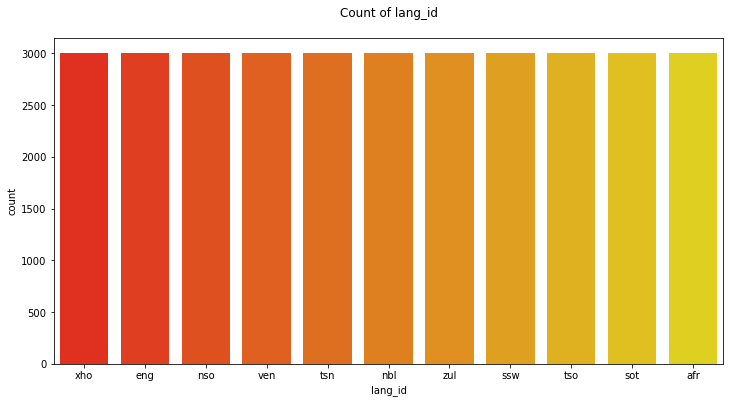

In [24]:
# Distributin of each language 
plt.figure(figsize=(12,6))
sns.countplot(x='lang_id',data=train, palette="autumn")
plt.title('Count of lang_id\n')
plt.show()

In [25]:
# count of observations per lan_id
train.lang_id.value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

unique Language IDs

- afr - Afrikaans
- eng - English
- nbl - isiNdebele
- nso - Sepedi
- sot - Sesotho
- ssw - siSwati
- tsn - Setswana
- tso - Xitsonga
- ven - Tshivenda
- xho - isiXhosa
- zul - isiZulu

<a id="four"></a>
## 4. Data cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data Cleaning ⚡ |
| :--------------------------- |
|  clean the dataset, and possibly create new features -using Natural language process . |

In [27]:
df = train.copy()
df.columns

Index(['lang_id', 'text'], dtype='object')

# 4.1 Cleaning the data 
Removing the noise in the data sets  such as punctuation and numbers  making the data more clean 

Cleaning the train data

In [31]:
# data cleaning for train data
# Make lower case
print ('Lowering case...')
df['text'] = df['text'].str.lower()
#removing tags 
to_remove = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')

#function to remove the tags
def cleantags(lang):
  cleanlang = re.sub(to_remove, '', lang)
  return cleanlang
df['text'] = df['text'].apply(cleantags)

# Remove punctuation
import string
print ('Cleaning punctuation...')
def remove_punctuation_numbers(lang):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in lang if l not in punc_numbers])
df['text'] = df['text'].apply(remove_punctuation_numbers)
df.head(10)

Lowering case...
Cleaning punctuation...


,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


# Cleaning the test data

In [34]:
#test data before being cleaned
test.head(10)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


In [32]:
df_test = test.copy()

In [33]:
# data cleaning for train data
# Make lower case
print ('Lowering case...')
df_test['text'] = df_test['text'].str.lower()
#removing tags 
to_remove = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')

#function to remove the tags
def cleantags(lang):
  cleanlang = re.sub(to_remove, '', lang)
  return cleanlang
df_test['text'] = df_test['text'].apply(cleantags)

# Remove punctuation
import string
print ('Cleaning punctuation...')
def remove_punctuation_numbers(lang):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in lang if l not in punc_numbers])
df_test['text'] =df_test['text'].apply(remove_punctuation_numbers)
df_test.head(10)

Lowering case...
Cleaning punctuation...


,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta
5,6,ke feela dilense tše hlakilego tša pono e tee ...
6,7,am final gems birthing optionszulutxt
7,8,ntjhafatso ya konteraka ya mosebetsi etsa bonn...
8,9,ugems uhlinzeka ngezinzuzo zemithi yezifo ezin...
9,10,so on occasion are statistics misused


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, create one or more regression models that are able to accurately predict the Sentiment. |

---

x = np.array(data["Text"])
y = np.array(data["language"])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [ ]:
model = MultinomialNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

<a id="six"></a>
## 7. Model Documentation and Submission file
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model documentation ⚡ |
| :--------------------------- |
| In this section it contains submission files and model saving |

---

<a id="ref"></a>
## Reference Links
<a href=#cont>Back to Table of Contents</a>